Os conjuntos de dados são principalmente centrados no mercado imobiliário de Londres. No entanto, ele contém muitos dados relevantes adicionais:

Preços médios mensais da habitação
Número anual de casas
Número anual de casas vendidas
Percentual anual de famílias que reciclam
Satisfação de vida anual
Salário médio anual dos moradores da região
Salário médio anual dos moradores da região
Número mensal de crimes cometidos
Número anual de empregos
Número anual de pessoas que vivem na área
Tamanho da área em hectares
Os dados são divididos por áreas de Londres chamadas distritos (existe uma bandeira para identificá-los), mas algumas das variáveis ​​têm outras regiões geográficas do Reino Unido para referência (como Inglaterra, Nordeste, etc.). Não foram feitas alterações nos dados, exceto pela fusão em um formato longo das tabelas originais.

In [125]:
from google.colab import files
uploaded = files.upload()

Saving housing_in_london_monthly_variables.csv to housing_in_london_monthly_variables (7).csv


In [0]:
#importando as bibliotecas necessarias
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
import numpy
import gzip
import seaborn as sns

In [0]:
#realiza a leitura do data-set
ds = pd.read_csv('housing_in_london_monthly_variables.csv')

In [82]:
#printa a quantidade de linhas e de colunas do data-set
print(ds.shape)

(13549, 7)


In [83]:
#printa as primeiras 5 linhas do data-set
ds.head(5)

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1


In [0]:
#apaga as colunas que não uteis
ds = ds.drop(['no_of_crimes'], axis=1)

In [85]:
#printa as primeiras 5 linhas do data-set
ds.head(5)

,date,area,average_price,code,houses_sold,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.0,1
1,1995-02-01,city of london,82203,E09000001,7.0,1
2,1995-03-01,city of london,79121,E09000001,14.0,1
3,1995-04-01,city of london,77101,E09000001,7.0,1
4,1995-05-01,city of london,84409,E09000001,10.0,1


In [86]:
#informaçoes gerais do data-set
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13549 non-null  object 
 1   area           13549 non-null  object 
 2   average_price  13549 non-null  int64  
 3   code           13549 non-null  object 
 4   houses_sold    13455 non-null  float64
 5   borough_flag   13549 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 635.2+ KB


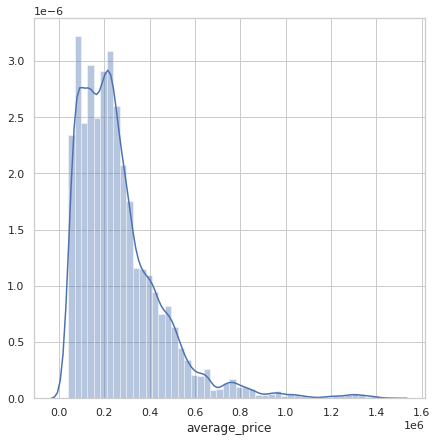

In [87]:
#plotando o grafico da coluna price
plt.figure(figsize = (7,7))
sns.set(style = "whitegrid")
f = sns.distplot(ds["average_price"])

In [0]:
#realizando o calculo do quantile
q1 = ds["average_price"].quantile(0.25)
q3 = ds["average_price"].quantile(0.75)
IQR = q3 - q1
IF = q1 - (1.5 * IQR)
OF = q3 + (1.5 * IQR)

In [89]:
ds = ds[~((ds["average_price"] < IF) | (ds["average_price"] > OF))]
ds.shape

(12984, 6)

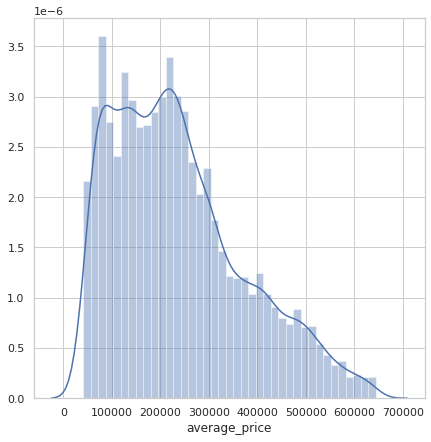

In [90]:
#plotando o grafico da coluna price
plt.figure(figsize = (7,7))
sns.set(style = "whitegrid")
f = sns.distplot(ds["average_price"])

In [100]:
#verificando os tipos numericos
list(set(ds.dtypes.tolist()))

[dtype('int8'), dtype('O'), dtype('int64'), dtype('float64')]

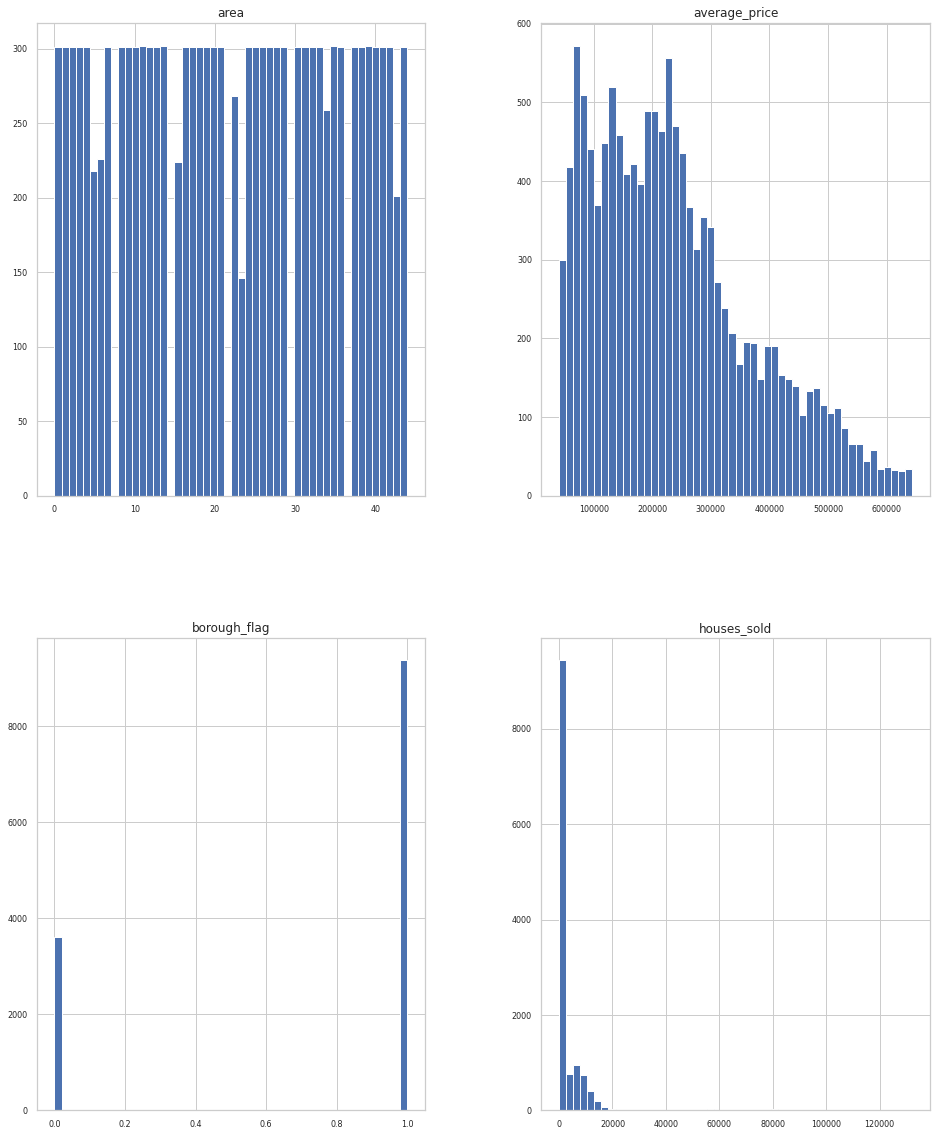

In [101]:
#Selecionando somente os tipos númericos e verificando a distribuição de seus dados
df_num = ds.select_dtypes(include = ['float64', 'int64', 'int8'])

df_num.head()
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [102]:
#Verificação de correlação entre as variávies e a average_price
df_num_corr = df_num.corr()['average_price'][:-1] # -1 pois a última linha é a Price
golden_features_list = df_num_corr[abs(df_num_corr) > 0.1].sort_values(ascending=False)
print("There is {} strongly correlated values with price:\n{}".format(len(golden_features_list), golden_features_list))

There is 2 strongly correlated values with price:
average_price    1.000000
houses_sold     -0.178006
Name: average_price, dtype: float64


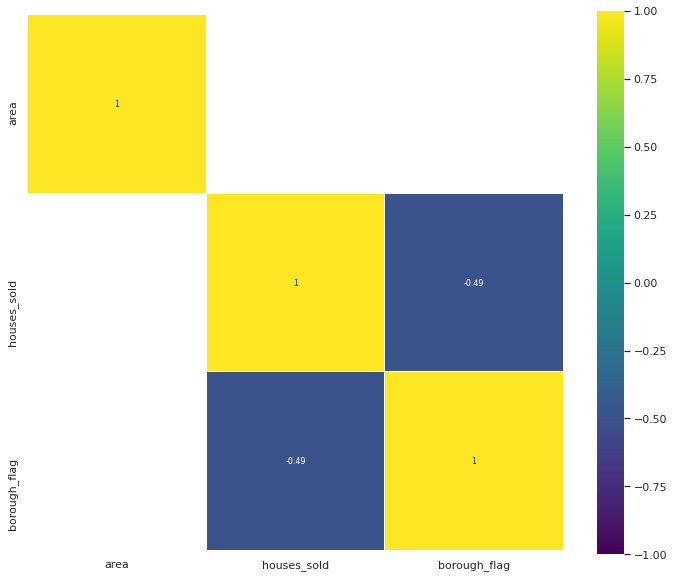

In [103]:
#Correlação entre as variáveis
import seaborn as sns

corr = df_num.drop('average_price', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

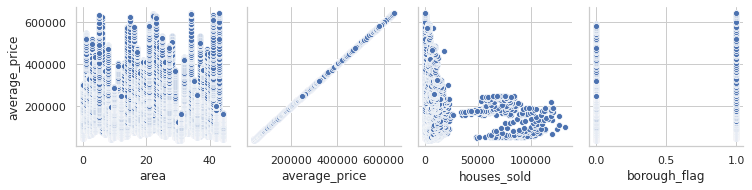

In [104]:
#Observando a distribuição de dados de cada coluna numérica em relação à average_price
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['average_price'])

In [0]:

ds["area"] = pd.to_numeric(ds["area"], errors= "ignore")
ds["houses_sold"] = pd.to_numeric(ds["houses_sold"], errors= "ignore")
ds["borough_flag"] = pd.to_numeric(ds["borough_flag"], errors= "ignore")

In [0]:
ds = ds.dropna()

In [0]:
x = ds[['area', 'houses_sold','borough_flag']]
y = ds["average_price"]

In [108]:
x.isnull().any()
x.shape

(12904, 3)

In [109]:
y.isnull().any()
y.shape

(12904,)

In [110]:
x

,area,houses_sold,borough_flag
0,6,17.0,1
1,6,7.0,1
2,6,14.0,1
3,6,7.0,1
4,6,10.0,1
...,...,...,...
13542,12,70681.0,0
13543,12,75079.0,0
13544,12,64605.0,0
13545,12,68677.0,0


In [0]:
#Separação dos conjunto de treinamento e teste
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold

# rkf.split(X)
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30)
#random_state = 12883823
#rkf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=random_state)
#x_train, x_test,y_train,y_test = rkf.split(x)

In [113]:
#Aplicação do Regressão Linear
#from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

#rf = RandomForestRegressor(n_estimators = 1500, verbose=1, criterion='mse')
rf = linear_model.LinearRegression()
rf.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [114]:
x_test

,area,houses_sold,borough_flag
6383,25,541.0,1
3435,14,191.0,1
311,0,127.0,1
11099,31,10423.0,0
3636,15,360.0,1
...,...,...,...
11253,44,11490.0,0
7992,34,262.0,1
3412,14,252.0,1
984,2,514.0,1


In [0]:
pred = rf.predict(x_test)

In [116]:
print("Conjunto de predições:\n {}".format(pred))

Conjunto de predições:
 [261947.5408305  259790.42549572 256874.08651257 ... 259763.09304534
 257121.39879999 257846.56890361]


In [117]:
# coeficientes
print('Coeficientes: \n', rf.coef_)
# mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, pred))
# Coeficiente de determinação: 1 é a predição perfeita
print('Coeficiente de determinação: %.2f'
      % r2_score(y_test, pred))

Coeficientes: 
 [ 2.10358261e+02 -4.48072957e-01  8.65448291e+04]
Mean squared error: 16374652330.49
Coeficiente de determinação: 0.09


In [118]:
pred.shape

(3872,)

In [119]:
x_test.shape

(3872, 3)

In [120]:
y_test.shape

(3872,)

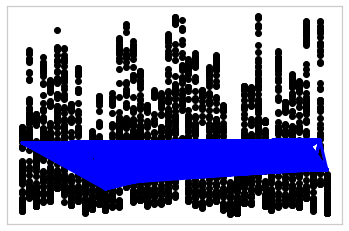

In [121]:
#Plotagem da regressão
plt.scatter(x_test['area'], y_test,  color='black')
plt.plot(x_test['area'], pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

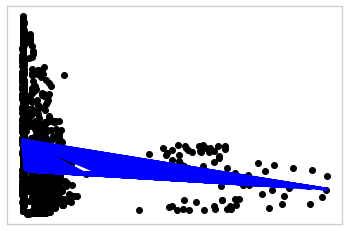

In [122]:
plt.scatter(x_test['houses_sold'], y_test,  color='black')
plt.plot(x_test['houses_sold'], pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

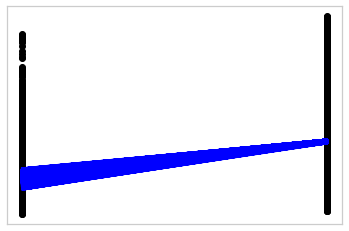

In [123]:
plt.scatter(x_test['borough_flag'], y_test,  color='black')
plt.plot(x_test['borough_flag'], pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [124]:
import pickle

filename = 'finalized_model.sav'
pickle.dump(rf, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.08873396395964783
